# Logistic Regression

- Data Preparation
- Visualisation
- Create Train and Test Set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary
- How to use sk-learn

# Data Preparation

In [1]:
# Data Generation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_1 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_2 = np.random.multivariate_normal(mean_02,cov_02,500)

# print(dist_1,dist_2)
print(dist_1.shape,dist_2.shape)

(500, 2) (500, 2)


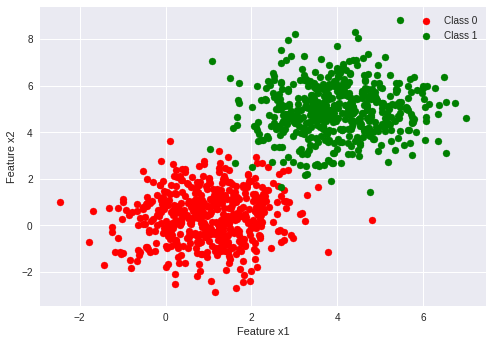

In [3]:
plt.style.use("seaborn")
plt.scatter(dist_1[:,0],dist_1[:,1],color = "red", label = "Class 0")
plt.scatter(dist_2[:,0],dist_2[:,1], color = "green", label = "Class 1")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000,3))

In [5]:
data[:500,:2] = dist_1
data[500:,:2] = dist_2

data[500:,-1] = 1.0

In [6]:
print(data)

[[ 1.03114637  0.47447982  0.        ]
 [ 0.98261997 -0.30930771  0.        ]
 [ 2.67299882 -0.18751271  0.        ]
 ...
 [ 2.60653199  5.37932102  1.        ]
 [ 2.51527793  6.42967875  1.        ]
 [ 3.52867595  4.46351292  1.        ]]


In [7]:
# Randomly Shuffle the data
np.random.shuffle(data)
print(data[:10])

[[ 0.02347462 -0.18868454  0.        ]
 [ 1.65345303  0.28871966  0.        ]
 [ 1.79725019  1.71588545  0.        ]
 [-0.24557165 -1.11091002  0.        ]
 [ 4.6244188   4.12382174  1.        ]
 [ 3.91505986  6.18175403  1.        ]
 [ 2.10419529 -0.09609035  0.        ]
 [ 0.35953959  0.52331617  0.        ]
 [ 1.56056359  0.50227845  0.        ]
 [ 2.68577075  7.52671974  1.        ]]


In [8]:
data.shape

(1000, 3)

In [9]:
# Divide the data into train and test part
split = int(0.8*data.shape[0])
x_train = data[:split,:-1]
x_test = data[split:,:-1]

y_train = data[:split,:-1]
y_test = data[split:,:-1]

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(800, 2) (800, 2) (200, 2) (200, 2)


# Visualization

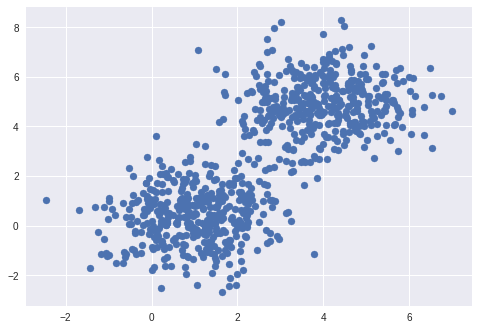

In [10]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.show()

In [11]:
# plt.scatter?

In [12]:
y_train.shape

(800, 2)

In [13]:
x_train[:,0].shape

(800,)

# Data Normalisation

In [14]:
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis =0)
x_std,x_mean

(array([1.81695084, 2.53002414]), array([2.50125538, 2.65999104]))

# Transforming the data 
- We dont have to calculate the mean and standard deviation for testing data because if you are computing a line that has been computed according to the training data then your test must be shifted by the SAME AMOUNT.
- The training and test data should be shifted or scaled by the same amount.
- It is possible that the training and test data has different mean and standard deviation but you have to apply the same mean and standard deviation to both training and testing data, so that it may not end up changing the relative distribution of the test data wrt training data

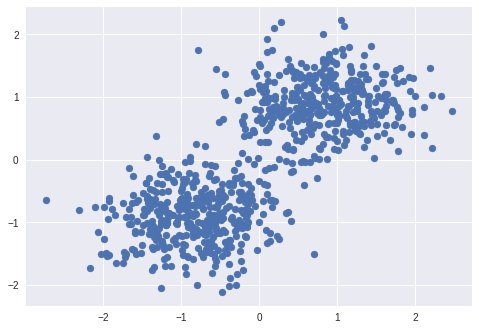

In [15]:
# Apply the Transformation for Training Data
x_train = (x_train - x_mean)/x_std

# Apply the Transformation for Testing Data
x_test = (x_test - x_mean)/x_std



plt.scatter(x_train[:,0],x_train[:,1])
plt.show()

In [16]:
print(x_train.std(axis = 0))

[1. 1.]


# Logistic Regression Implementation

In [17]:
print(y_train.shape)

(800, 2)


In [18]:
# #supress warnings
# import warnings
# warnings.filterwarnings('ignore')

In [26]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))



def hypothesis(x,theta):
    '''
    x - entire array (m, n+1)
    theta - np.array(n+1,1)
    '''
    return sigmoid(np.dot(x,theta))

def error(x,y,theta):
    """
    parameters:
    x - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    
    return:
        scaler_value - LOSS
    """
    
    hi = hypothesis(x,theta)
    e = -1*np.mean(y * np.log(hi) + ((1-y) * np.log(1-hi)))
    
    return e

In [27]:
sigmoid(100)

1.0

In [28]:
# Gradient Descent Function which will help to achieve the optimal values of theta
def gradient(x,y,theta):
    """
    parameters:
    x - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    
    return:
        gradient_vector - (n+1,1)
    """
    hi = hypothesis(x,theta)
#     print(hi)
    grad = np.dot(x.T,(y-hi))
    m = x.shape[0]
    return grad/m


def gradient_descent(x,y,lr=0.1,max_itr=500):
    n = x.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_itr):
        err = error(x,y,theta)
        error_list.append(err)
    
        grad = gradient(x,y,theta)
        
        # Update
        theta = theta + lr*grad
        
    return (theta,error_list )

In [29]:
y_train.shape

(1600, 1)

In [23]:
ones = np.ones((x_train.shape[0],1))
x_new_train = np.float128(np.hstack((ones,x_train)))

print(x_new_train.shape)
# print(x_new_train)

# print(y_train.shape)
y_train = y_train.reshape((-1,1))
# print(y_train.shape)

(800, 3)


In [24]:
theta,error_list = gradient_descent(x_new_train,y_train)

ValueError: operands could not be broadcast together with shapes (1600,1) (800,1) 

In [ ]:
plt.plot(error_list)
plt.show()

In [ ]:
# Visualizing the sigmoid function 
# a = np.linspace(-10,10,20) 
a = np.linspace(-10,10,20)
plt.scatter(a,sigmoid(a))
plt.show()

In [ ]:
theta
y_train.reshape?

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.show()

In [ ]:
x1 = np.arange(2,4)
x1

In [ ]:
x1 = np.arange(2,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.scatter(x_train[:,0],x_train[:,1])
plt.plot(x1,x2)
plt.show()

In [ ]:
print(theta[0],theta[1],theta[2])

In [ ]:
print(theta[0][0],theta[1],theta[2])

In [ ]:
# np.arange?

# Predictions & Accuracy

In [ ]:
x_new_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
print(x_new_test.shape)
print(x_new_test[:3,:])

In [ ]:
def predict(x,theta):
    h = hypothesis(x,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
#     print(h[:5,:])
    
    return output

predict(x_new_train,theta)
x_train_preds = predict(x_new_train,theta)
x_test_preds = predict(x_new_test,theta)

print(x_train_preds.shape,x_test_preds.shape)